In [12]:
!pip install tensorflow
!pip install keras

In [13]:
import keras
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

seed=0
tf.config.experimental.enable_op_determinism()
tf.random.set_seed(seed)
keras.utils.set_random_seed(seed)



**데이터 정규화**

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

**훈련데이터의 첫번째 데이터를 시각화(Plot)**

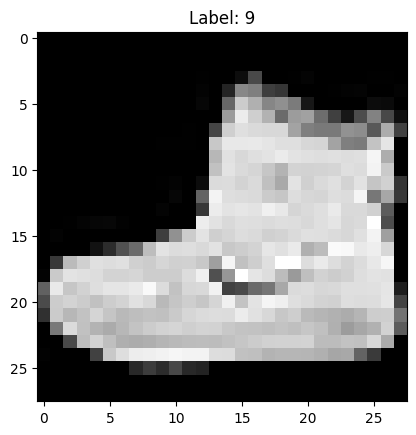

In [16]:
plt.imshow(train_images[0], cmap='gray')
plt.title('Label: {}'.format(train_labels[0]))
plt.show()

**DNN 모델 구현(학습률 0.1)**

- 히든레이어 1개(784->512->10)
- epochs : 100
- 최적화함수 : Adam
- 활성화함수 : relu
- batch_size : 256
- 손실함수 : sparse_categorical_crossentropy

In [17]:
model = Sequential ([
    Flatten(input_shape=(28,28)),
    Dense(512, activation='relu', kernel_initializer=keras.initializers.glorot_uniform(seed=seed)),
    Dense(10, activation='softmax')
])
Adam_ = keras.optimizers.Adam(learning_rate = 0.1)

model.compile(optimizer = Adam_,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

**DNN 모델 학습 & 정확도 출력**

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5258 - loss: 16.2307 - val_accuracy: 0.6753 - val_loss: 0.8189
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7129 - loss: 0.7193 - val_accuracy: 0.7214 - val_loss: 0.6793
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7264 - loss: 0.6768 - val_accuracy: 0.6940 - val_loss: 0.7649
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7271 - loss: 0.6741 - val_accuracy: 0.7328 - val_loss: 0.6965
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7301 - loss: 0.6809 - val_accuracy: 0.7060 - val_loss: 0.7164
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7298 - loss: 0.6832 - val_accuracy: 0.6885 - val_loss: 0.8779
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7218 - loss: 0.7393 - val_accuracy: 0.7169 - val_loss: 0.7226
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7255 - loss: 0.6925 - val_ac

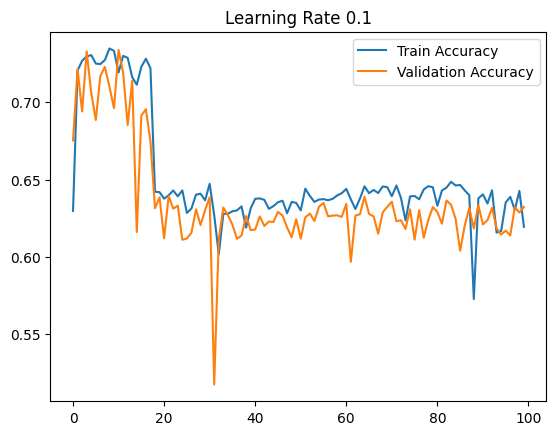

In [18]:
history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels), batch_size=256)

test_loss, test_accuracy = model.evaluate(test_images, test_labels, batch_size = 256)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Rate 0.1')
plt.legend()
plt.show()

**DNN 모델 구현(학습률 0.001)**

- 히든레이어 1개(784->512->10)
- epochs : 100
- 최적화함수 : Adam
- 활성화함수 : relu
- batch_size : 256
- 손실함수 : sparse_categorical_crossentropy

In [19]:
model = Sequential ([
    Flatten(input_shape=(28,28)),
    Dense(512, activation='relu', kernel_initializer=keras.initializers.glorot_uniform(seed=seed)),
    Dense(10, activation='softmax')
])
Adam_ = keras.optimizers.Adam(learning_rate = 0.001)

model.compile(optimizer = Adam_,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

**DNN 모델 학습 & 정확도 출력**

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.7590 - loss: 0.7067 - val_accuracy: 0.8319 - val_loss: 0.4764
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8568 - loss: 0.4050 - val_accuracy: 0.8400 - val_loss: 0.4553
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8723 - loss: 0.3572 - val_accuracy: 0.8498 - val_loss: 0.4259
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8829 - loss: 0.3250 - val_accuracy: 0.8567 - val_loss: 0.3985
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8902 - loss: 0.3022 - val_accuracy: 0.8628 - val_loss: 0.3824
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8973 - loss: 0.2833 - val_accuracy: 0.8653 - val_loss: 0.3746
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9022 - loss: 0.2679 - val_accuracy: 0.8678 - val_loss: 0.3626
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9076 - loss: 0.2544 - val_acc

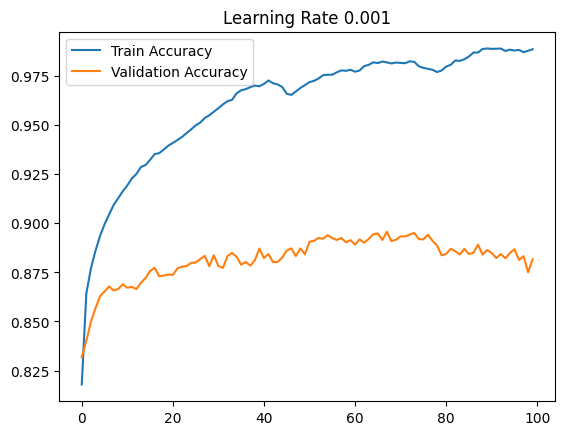

In [20]:
history = model.fit(train_images, train_labels, epochs=100,
                    validation_data=(test_images, test_labels), batch_size=256)

test_loss, test_accuracy = model.evaluate(test_images, test_labels, batch_size = 256)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Rate 0.001')
plt.legend()
plt.show()